# **I. Exploratory Data Analysis**

In [ ]:
#Display the first 10 rows of the three datasets
df_business.show(10)
df_review.show(10)
df_user.show(10)

+--------------------+--------------------+--------------------+--------------------+--------------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|             address|          attributes|         business_id|          categories|          city|               hours|is_open|  latitude|   longitude|                name|postal_code|review_count|stars|state|
+--------------------+--------------------+--------------------+--------------------+--------------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|1616 Chapala St, ...|{null, null, null...|Pns2l4eNsfO8kk83d...|Doctors, Traditio...| Santa Barbara|                null|      0|34.4266787|-119.7111968|Abby Rappoport, L...|      93101|           7|  5.0|   CA|
|87 Grasso Plaza S...|{null, null, null...|mpf3x-BjTdTEA3yCZ...|Shipping Centers,...|        Affton|{8:0-18:30, 0:0-0...|      1| 38.551126|  -90.335695

In [ ]:
# Explore the data types
df_business.dtypes
df_review.dtypes
df_user.dtypes

[('average_stars', 'double'),
 ('compliment_cool', 'bigint'),
 ('compliment_cute', 'bigint'),
 ('compliment_funny', 'bigint'),
 ('compliment_hot', 'bigint'),
 ('compliment_list', 'bigint'),
 ('compliment_more', 'bigint'),
 ('compliment_note', 'bigint'),
 ('compliment_photos', 'bigint'),
 ('compliment_plain', 'bigint'),
 ('compliment_profile', 'bigint'),
 ('compliment_writer', 'bigint'),
 ('cool', 'bigint'),
 ('elite', 'string'),
 ('fans', 'bigint'),
 ('friends', 'string'),
 ('funny', 'bigint'),
 ('name', 'string'),
 ('review_count', 'bigint'),
 ('useful', 'bigint'),
 ('user_id', 'string'),
 ('yelping_since', 'string')]

1. Overview of dataset

In [ ]:
print("Count of reviews in the review dataset is: {}".format(df_review.count()))
print("Count of businesses in the business dataset is: {}".format(df_business.count()))
print("Count of users in the user dataset is: {}".format(df_user.count()))

Count of reviews in the review dataset is: 6990280
Count of businesses in the business dataset is: 150346
Count of users in the user dataset is: 1987897


2. Data Exploration with visualizations

**Businesses that include the highest count of reviews**

We filter the reviews that have the star ratings greater than 3.

We transform our target variable in the binary classification (0/1). This means star ratings greater than 3 is labeled as 1, otherwise 0.

In [ ]:
#filter reviews with ratings > 3
filter_review = df_review.filter('stars >3')
review_by_id = filter_review.groupby('business_id').count()
review_sort = review_by_id.sort('count',ascending=False)

# create a table showing top 10 businesses with the sorted reviews
business_features = df_business.select('business_id','name','categories')
review_by_name = business_features.join(review_sort,'business_id','inner')
business_review = review_by_name.limit(10)
business_review.show()

+--------------------+--------------------+--------------------+-----+
|         business_id|                name|          categories|count|
+--------------------+--------------------+--------------------+-----+
|sk2lZI4zmuGAccd3D...|Boyd Hill Nature ...|Active Life, Park...|   33|
|83IeQHroXEctmMpK1...|The Richel D'Ambr...|Hair Salons, Day ...|   39|
|6e85By5Jy7MMnW2cE...|          Wanderwell|Tax Services, Boo...|    5|
|WKMJwqnfZKsAae75R...|Roast Coffeehouse...|Coffee & Tea, Foo...|   31|
|jIBjZcqVOU4pOVT-s...|           IRB Sushi|Sushi Bars, Resta...|   34|
|NQhyMw8SOU1HB-V9X...|Champion Chevrole...|Automotive, Auto ...|   20|
|q6661I3CGW0UB740E...|         India House|Home & Garden, Ho...|   32|
|lpbt16sSm4BTcfeq4...|           Super Wok|Restaurants, Chinese|   38|
|AwmeLVLEfdFoCa0La...|      The Beer Store|Food, Beer, Wine ...|   16|
|RZ-FNTXvqHKngyLGD...|Gaetano's of West...|Italian, Food, Re...|   15|
+--------------------+--------------------+--------------------+-----+



**Count of top business across all industries**

In [ ]:
Industry = df_business.select('categories')
individual_category = Industry.select(explode(split('categories', ',')).alias('Industry'))
grouped_category = individual_category.groupby('Industry').count()
top_category = grouped_category.sort('count',ascending=False)
top_category.show(10,truncate=False)

+-----------------+-----+
|Industry         |count|
+-----------------+-----+
| Restaurants     |36978|
| Food            |20998|
| Shopping        |18915|
|Restaurants      |15290|
| Home Services   |10563|
| Nightlife       |9990 |
| Beauty & Spas   |9907 |
| Bars            |9130 |
| Health & Medical|8832 |
| Local Services  |8556 |
+-----------------+-----+
only showing top 10 rows



**Distribution of star ratings within the review data**

In [ ]:
rating = df_business.select('stars')
group_rating = rating.groupby('stars').count()
rating_high = group_rating.sort('count',ascending=False)
rating_high.show(truncate=False)

+-----+-----+
|stars|count|
+-----+-----+
|4.0  |31125|
|4.5  |27181|
|3.5  |26519|
|3.0  |18453|
|5.0  |16307|
|2.5  |14316|
|2.0  |9527 |
|1.5  |4932 |
|1.0  |1986 |
+-----+-----+



 **Distribution of cities with the highest number of businesses**

In [ ]:
loc = df_business.select('business_id','city')
rw_city = df_review.select('business_id')
merge_city = loc.join(rw_city,'business_id','inner')
grouped_review_city = merge_city.groupby('city').count()
most_reviewed_city = grouped_review_city.groupby('city').sum()
most_reviewed_city.sort('sum(count)',ascending=False).show(10)

+-------------+----------+
|         city|sum(count)|
+-------------+----------+
| Philadelphia|    967552|
|  New Orleans|    635364|
|        Tampa|    454889|
|    Nashville|    451571|
|       Tucson|    404880|
| Indianapolis|    361489|
|         Reno|    351573|
|Santa Barbara|    269630|
|  Saint Louis|    253437|
|        Boise|    105366|
+-------------+----------+
only showing top 10 rows



**Distribution of reviews of each star rating**

+-----+-------+
|stars|  count|
+-----+-------+
|  1.0|1069561|
|  2.0| 544240|
|  3.0| 691934|
|  4.0|1452918|
|  5.0|3231627|
+-----+-------+



<Axes: xlabel='stars', ylabel='count'>

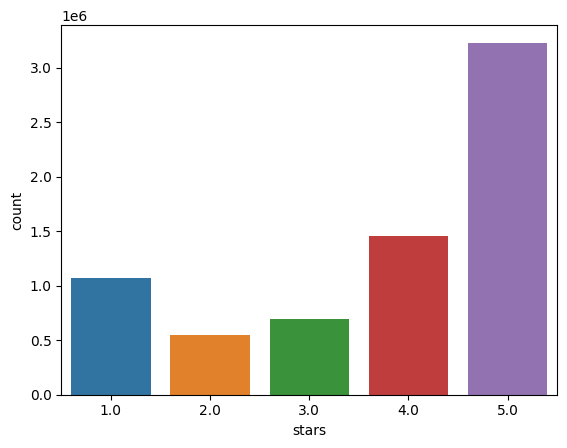

In [ ]:
df_review1= df_review.groupBy('stars').agg(count('review_id').alias('count')).sort('stars')
df_review1.show()
temp=df_review1.toPandas()
sns.barplot(x='stars', y='count', data=temp)

**Explore null values**


In [ ]:
df_review.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)



**Distribution of active versus inactive businesses**

<Axes: xlabel='is_open', ylabel='count'>

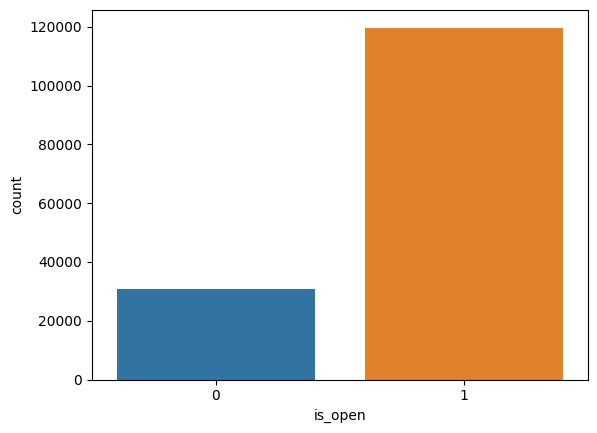

In [ ]:
df_open = df_business.groupBy('is_open').count().toPandas()
df_open
sns.barplot(x='is_open', y='count', data=df_open)

**Distribution of businesses in the most reviewed cities**

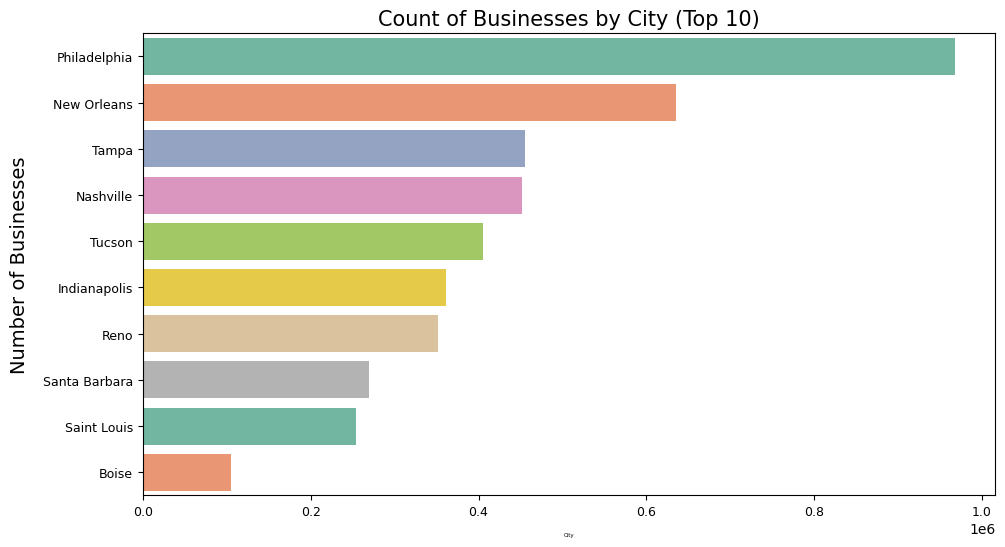

In [ ]:
topcity = merge_city.groupBy('city').count().sort('count').orderBy(['count'], ascending=[0]).toPandas()
topcity.head()

plt.figure(figsize=(11,6))
sns.barplot(y=topcity['city'].values[:10], x=topcity['count'].values[:10],palette=sns.color_palette("Set2"))
plt.ylabel('Number of Businesses', fontsize=14, labelpad=10)
plt.xlabel('City', fontsize=4, labelpad=10)
plt.title('Count of Businesses by City (Top 10)', fontsize=15)
plt.tick_params(labelsize=9)
plt.xticks(rotation=0)
plt.show()

**Distribution of most reviewed businesses across all industries**

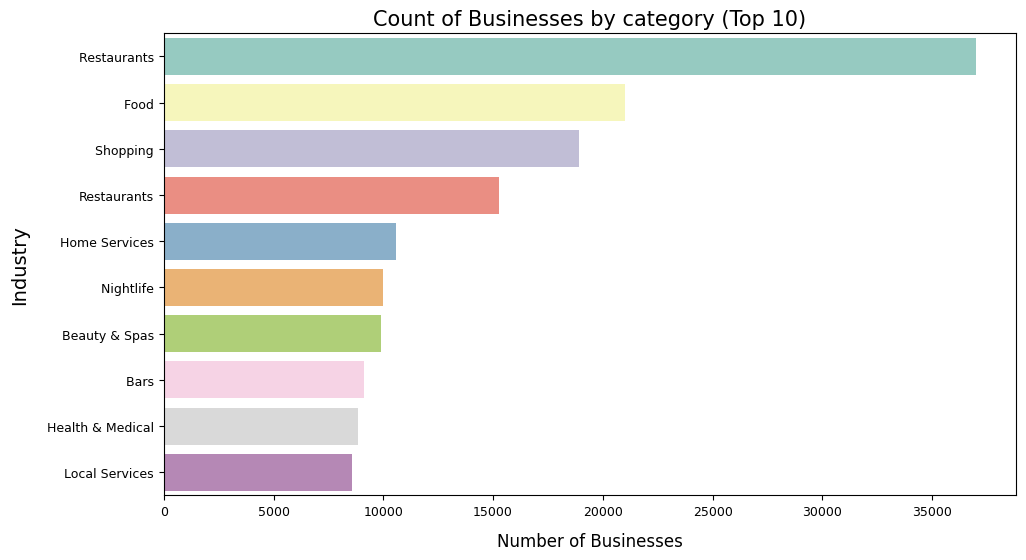

In [ ]:
topcat = individual_category.groupBy('Industry').count().sort('count').orderBy(['count'], ascending=[0]).toPandas()
topcat.head()
plt.figure(figsize=(11,6))
sns.barplot(y=topcat['Industry'].values[:10], x=topcat['count'].values[:10], palette=sns.color_palette("Set3"))
plt.ylabel('Industry', fontsize=14, labelpad=10)
plt.xlabel('Number of Businesses', fontsize=12, labelpad=10)
plt.title('Count of Businesses by category (Top 10)', fontsize=15)
plt.tick_params(labelsize=9)
plt.xticks(rotation=0)
plt.show()